Data was collected from
- [U.S. Bureau of Labor Statistics](https://www.bls.gov/iag/tgs/iag31-33.htm#workforce)
- [U.S. Bureau of Economic Analysis](https://apps.bea.gov/iTable/iTable.cfm?reqid=70&step=1&acrdn=4)

- Inspiration [The.data.guy from TikTok](https://www.tiktok.com/@the.data.guy/video/6865407631775845637?is_copy_url=1&is_from_webapp=v1)

In [1]:
# Data analysis and wrangling
import pandas as pd
import numpy as np
import missingno

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# # Set warning display options
# import warnings
# warnings.filterwarnings('ignore')

# Set Pandas display options
pd.set_option('max_columns', None)
pd.set_option('max_colwidth', None)
pd.set_option('max_rows', None)
pd.set_option('precision', 4)

In [3]:
path1 = './manufacturing_1939_2021.csv'
path2 = './manufacturing_1998_2020.csv'
path3 = './truck_data.csv'

df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
truck_df = pd.read_csv(path3)

all_dfs = [df1, df2, truck_df]

In [4]:
for df in all_dfs:
    display(df.head())

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1939,9077,9175,9275,9309,9299,9315,9231,9400,9604,9873,9896,9949.0
1,1940,9927,9916,9884,9817,9810,9832,9766,10048,10258,10471,10643,10847.0
2,1941,10993,11211,11409,11698,11957,12204,12382,12532,12683,12770,12810,12876.0
3,1942,12965,13127,13311,13509,13704,13842,14072,14339,14582,14772,14971,15288.0
4,1943,15532,15685,15856,15961,16044,16204,16306,16369,16366,16512,16598,16526.0


,GeoName,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,United States,18108900,17846900,17750600,16921600,15745700,14975000,14790900,14724200,14675200,14460800,13971300,12478200,12092900,12376700,12596200,12761200,12907600,13078600,13131900,13233200,13450200,13528000,12807500
1,Alabama,371319,361668,353784,335261,315019,299642,298438,306074,309950,304225,290233,254643,244202,246344,252491,258984,262500,267881,271192,274115,277594,279250,268115
2,Alaska,15223,13839,13761,14326,13071,13289,14020,14419,15105,15372,15038,15295,14940,16078,16459,17044,16910,16719,16440,16071,15384,15547,(D)
3,Arizona,220487,217168,219420,211028,193778,185806,186909,190478,195723,193259,183747,165325,158837,161619,166685,168502,169370,171753,175188,178653,184541,191002,190143
4,Arkansas,243383,241210,240220,231336,218261,210090,207945,205415,203171,193681,186262,166722,162730,162402,159500,157605,158469,160559,160972,163437,166358,167828,160231


,GeoName,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,United States,1887900,1873500,1974100,1954300,1942600,1899500,1953300,2048700,2107300,2170600,2051900,1944900,1910600,1969100,2000600,2049900,2098700,2185900,2143300,2186100,2270800,2327100,2253500
1,Alabama,41508,40967,42204,41363,40336,38867,(D),41404,42308,42335,39027,35889,35422,35476,35325,35838,36163,37106,36709,37542,38767,39392,38364
2,Alaska,3472,3260,3367,3452,3667,3659,3846,3928,4094,4229,4005,4025,3931,3884,3822,3917,3575,3567,3455,3222,3260,3342,3252
3,Arizona,22667,22908,24094,24168,25253,25039,25926,28297,29509,30324,28553,26999,26357,27455,28467,28774,29078,31008,31413,31993,33803,35327,35426
4,Arkansas,39946,39883,40809,42252,45047,43664,43534,45429,46457,47615,44091,40482,40522,41340,41027,40297,40716,41538,40459,39680,40662,41480,40078


In [5]:
# # Set year as index
# df1.set_index('Year', inplace=True)
# df1.head()

In [6]:
# Set values to millions
MFG39 = df1.apply(lambda x: x / 1000)

# Reset Year
MFG39['Year'] = MFG39['Year'].apply(lambda x: x * 1000).astype(int)
MFG39.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1939,9.077,9.175,9.275,9.309,9.299,9.315,9.231,9.400,9.604,9.873,9.896,9.949
1,1940,9.927,9.916,9.884,9.817,9.810,9.832,9.766,10.048,10.258,10.471,10.643,10.847
2,1941,10.993,11.211,11.409,11.698,11.957,12.204,12.382,12.532,12.683,12.770,12.810,12.876
3,1942,12.965,13.127,13.311,13.509,13.704,13.842,14.072,14.339,14.582,14.772,14.971,15.288
4,1943,15.532,15.685,15.856,15.961,16.044,16.204,16.306,16.369,16.366,16.512,16.598,16.526


In [7]:
MFG39.dtypes

Year      int32
Jan     float64
Feb     float64
Mar     float64
Apr     float64
May     float64
Jun     float64
Jul     float64
Aug     float64
Sep     float64
Oct     float64
Nov     float64
Dec     float64
dtype: object

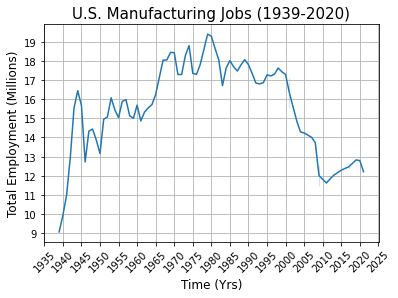

In [8]:
sns.lineplot(data=MFG39, x='Year', y='Jan')

plt.title('U.S. Manufacturing Jobs (1939-2020)', fontsize=15)

plt.ticklabel_format(axis='y', style='plain')
plt.locator_params(axis='y', nbins=15)
plt.ylabel('Total Employment (Millions)', fontsize=12)

plt.xticks(rotation=45)
plt.locator_params(axis='x', nbins=20)
plt.xlabel('Time (Yrs)', fontsize=12)

plt.grid()
plt.show()

In [9]:
# Copy to new df 
MFG98 = df2.copy()

# Set index to GeoName and remove GeoName from header 
MFG98.set_index('GeoName', inplace=True)
MFG98.index.name = ''

# Transpose dataframe
MFG98 = MFG98.transpose()

# Rename column to Year and reset index
MFG98.index.names = ['Year']
MFG98.reset_index(inplace=True)

MFG98.head()

,Year,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,New England,Mideast,Great Lakes,Plains,Southeast,Southwest,Rocky Mountain,Far West
0,1998,18108900,371319,15223,220487,243383,1941979,200214,253945,43771,3890,475743,554195,19148,72009,914428,671064,255398,208118,310244,185917,85222,181369,431716,904411,408825,234316,386154,24837,115024,42792,107859,440942,48052,802733,812743,23093,1058696,177302,238241,894901,74044,346155,43130,513980,1117173,133291,47076,379196,377115,79172,607508,11357,999862,2367606,4156107,1439742,4506363,1563014,441708,2634498
1,1999,17846900,361668,13839,217168,241210,1901807,196837,245564,44693,3962,471913,548441,19090,73140,893277,677481,257445,205686,312286,181994,84555,178319,418934,917182,407601,233784,380534,25138,113843,43683,105133,426728,46558,780293,795554,23024,1048804,175758,232609,877751,72610,338957,43357,506812,1097455,131884,47535,368432,360662,78109,606407,11394,974331,2311746,4143151,1431490,4439160,1536939,438393,2571690
2,2000,17750600,353784,13761,219420,240220,1919727,197640,240836,43280,3945,469515,538010,19378,74262,880434,674324,255881,203835,314911,178325,83113,179005,416792,911843,407496,223867,373084,24863,115308,45262,106369,428991,46947,765716,778251,23983,1046727,178043,233467,879394,71771,338640,44031,498790,1103180,130901,48422,363465,347942,77226,604927,11296,967303,2300331,4118255,1423618,4375004,1547590,438962,2579537
3,2001,16921600,335261,14326,211028,231336,1867740,191860,233275,40171,3765,452618,519607,19542,72476,831800,626153,245631,199980,298078,178189,78734,174404,399034,845420,389674,204440,350953,24436,113289,46319,101279,408397,45736,730571,717563,25150,972326,176089,226468,840880,69709,319570,42386,463947,1067636,127024,48113,351234,331347,74355,570861,11420,930144,2198188,3846560,1367063,4146198,1500489,427216,2505742
4,2002,15745700,315019,13071,193778,218261,1720515,176916,218460,37820,(D),428817,487834,18413,68874,771559,599062,233073,188905,281207,166754,72282,162277,359935,774177,368628,191684,332411,23178,108768,45959,88690,376900,43812,675738,659481,24871,901817,158860,212393,777521,64402,296122,39903,439983,991865,118810,43483,329548,300282,70857,538631,(D),847252,(D),3585246,1296559,3885567,1388315,(D),2310633


In [10]:
# Replace all missing values as NaNs
MFG98.replace('(D)', np.nan, inplace=True)

# Convert dataframe to numerical values
MFG98 = MFG98.astype(float)
MFG98['Year'] = MFG98['Year'].astype(int)

# Fill in NaNs by the average of the preceding and succeeding values
MFG98 = MFG98.interpolate()
MFG98

,Year,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,New England,Mideast,Great Lakes,Plains,Southeast,Southwest,Rocky Mountain,Far West
0,1998,1.8109e+07,371319.0,15223.0,220487.0,243383.0,1941979.0,200214.0,253945.0,43771.0,3890.0,475743.0,554195.0,19148.0,72009.0,914428.0,671064.0,255398.0,208118.0,310244.0,185917.0,85222.0,181369.0,431716.0,904411.0,408825.0,234316.0,386154.0,24837.0,115024.0,42792.0,107859.0,440942.0,48052.0,802733.0,812743.0,23093.0,1058696.0,177302.0,238241.0,894901.0,74044.0,346155.0,43130.0,513980.0,1117173.0,133291.0,47076.0,379196.0,377115.0,79172.0,607508.0,11357.0,999862.0,2367606.0,4156107.0,1439742.0,4506363.0,1563014.0,441708.0,2634498.0
1,1999,1.7847e+07,361668.0,13839.0,217168.0,241210.0,1901807.0,196837.0,245564.0,44693.0,3962.0,471913.0,548441.0,19090.0,73140.0,893277.0,677481.0,257445.0,205686.0,312286.0,181994.0,84555.0,178319.0,418934.0,917182.0,407601.0,233784.0,380534.0,25138.0,113843.0,43683.0,105133.0,426728.0,46558.0,780293.0,795554.0,23024.0,1048804.0,175758.0,232609.0,877751.0,72610.0,338957.0,43357.0,506812.0,1097455.0,131884.0,47535.0,368432.0,360662.0,78109.0,606407.0,11394.0,974331.0,2311746.0,4143151.0,1431490.0,4439160.0,1536939.0,438393.0,2571690.0
2,2000,1.7751e+07,353784.0,13761.0,219420.0,240220.0,1919727.0,197640.0,240836.0,43280.0,3945.0,469515.0,538010.0,19378.0,74262.0,880434.0,674324.0,255881.0,203835.0,314911.0,178325.0,83113.0,179005.0,416792.0,911843.0,407496.0,223867.0,373084.0,24863.0,115308.0,45262.0,106369.0,428991.0,46947.0,765716.0,778251.0,23983.0,1046727.0,178043.0,233467.0,879394.0,71771.0,338640.0,44031.0,498790.0,1103180.0,130901.0,48422.0,363465.0,347942.0,77226.0,604927.0,11296.0,967303.0,2300331.0,4118255.0,1423618.0,4375004.0,1547590.0,438962.0,2579537.0
3,2001,1.6922e+07,335261.0,14326.0,211028.0,231336.0,1867740.0,191860.0,233275.0,40171.0,3765.0,452618.0,519607.0,19542.0,72476.0,831800.0,626153.0,245631.0,199980.0,298078.0,178189.0,78734.0,174404.0,399034.0,845420.0,389674.0,204440.0,350953.0,24436.0,113289.0,46319.0,101279.0,408397.0,45736.0,730571.0,717563.0,25150.0,972326.0,176089.0,226468.0,840880.0,69709.0,319570.0,42386.0,463947.0,1067636.0,127024.0,48113.0,351234.0,331347.0,74355.0,570861.0,11420.0,930144.0,2198188.0,3846560.0,1367063.0,4146198.0,1500489.0,427216.0,2505742.0
4,2002,1.5746e+07,315019.0,13071.0,193778.0,218261.0,1720515.0,176916.0,218460.0,37820.0,3356.0,428817.0,487834.0,18413.0,68874.0,771559.0,599062.0,233073.0,188905.0,281207.0,166754.0,72282.0,162277.0,359935.0,774177.0,368628.0,191684.0,332411.0,23178.0,108768.0,45959.0,88690.0,376900.0,43812.0,675738.0,659481.0,24871.0,901817.0,158860.0,212393.0,777521.0,64402.0,296122.0,39903.0,439983.0,991865.0,118810.0,43483.0,329548.0,300282.0,70857.0,538631.0,11029.0,847252.0,2057418.0,3585246.0,1296559.0,3885567.0,1388315.0,404459.0,2310633.0
5,2003,1.4975e+07,299642.0,13289.0,185806.0,210090.0,1615130.0,163690.0,207121.0,36406.0,2947.0,412015.0,463817.0,17957.0,66120.0,731441.0,582502.0,225517.0,179013.0,271368.0,162158.0,68285.0,152933.0,333712.0,732277.0,356762.0,182618.0,320093.0,22028.0,104758.0,46768.0,83834.0,359043.0,41599.0,637411.0,618313.0,24524.0,860594.0,149720.0,205306.0,727908.0,60313.0,284386.0,39079.0,423878.0,943773.0,119226.0,40080.0,312880.0,281070.0,66721.0,518441.0,10638.0,793345.0,1916648.0,3425255.0,1249746.0,3707886.0,1320898.0,381702.0,2179520.0
6,2004,1.4791e+07,298438.0,14020.0,186909.0,207945.0,1601392.0,161891.0,204883.0,35560.0,2812.0,416098.0,462231.0,18541.0,66395.0,713706.0,582240.0,228778.0,18

In [11]:
# Set dataframe values to Thousands
MFG98 = MFG98.apply(lambda x: x / 1000)

# Reset Year
MFG98['Year'] = MFG98['Year'].apply(lambda x: x * 1000).astype(int)

# Set United States to Millions
MFG98['United States'] = MFG98['United States'].apply(lambda x: x / 1000)
MFG98.head()

,Year,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,New England,Mideast,Great Lakes,Plains,Southeast,Southwest,Rocky Mountain,Far West
0,1998,18.1089,371.319,15.223,220.487,243.383,1941.979,200.214,253.945,43.771,3.890,475.743,554.195,19.148,72.009,914.428,671.064,255.398,208.118,310.244,185.917,85.222,181.369,431.716,904.411,408.825,234.316,386.154,24.837,115.024,42.792,107.859,440.942,48.052,802.733,812.743,23.093,1058.696,177.302,238.241,894.901,74.044,346.155,43.130,513.980,1117.173,133.291,47.076,379.196,377.115,79.172,607.508,11.357,999.862,2367.606,4156.107,1439.742,4506.363,1563.014,441.708,2634.498
1,1999,17.8469,361.668,13.839,217.168,241.210,1901.807,196.837,245.564,44.693,3.962,471.913,548.441,19.090,73.140,893.277,677.481,257.445,205.686,312.286,181.994,84.555,178.319,418.934,917.182,407.601,233.784,380.534,25.138,113.843,43.683,105.133,426.728,46.558,780.293,795.554,23.024,1048.804,175.758,232.609,877.751,72.610,338.957,43.357,506.812,1097.455,131.884,47.535,368.432,360.662,78.109,606.407,11.394,974.331,2311.746,4143.151,1431.490,4439.160,1536.939,438.393,2571.690
2,2000,17.7506,353.784,13.761,219.420,240.220,1919.727,197.640,240.836,43.280,3.945,469.515,538.010,19.378,74.262,880.434,674.324,255.881,203.835,314.911,178.325,83.113,179.005,416.792,911.843,407.496,223.867,373.084,24.863,115.308,45.262,106.369,428.991,46.947,765.716,778.251,23.983,1046.727,178.043,233.467,879.394,71.771,338.640,44.031,498.790,1103.180,130.901,48.422,363.465,347.942,77.226,604.927,11.296,967.303,2300.331,4118.255,1423.618,4375.004,1547.590,438.962,2579.537
3,2001,16.9216,335.261,14.326,211.028,231.336,1867.740,191.860,233.275,40.171,3.765,452.618,519.607,19.542,72.476,831.800,626.153,245.631,199.980,298.078,178.189,78.734,174.404,399.034,845.420,389.674,204.440,350.953,24.436,113.289,46.319,101.279,408.397,45.736,730.571,717.563,25.150,972.326,176.089,226.468,840.880,69.709,319.570,42.386,463.947,1067.636,127.024,48.113,351.234,331.347,74.355,570.861,11.420,930.144,2198.188,3846.560,1367.063,4146.198,1500.489,427.216,2505.742
4,2001,15.7457,315.019,13.071,193.778,218.261,1720.515,176.916,218.460,37.820,3.356,428.817,487.834,18.413,68.874,771.559,599.062,233.073,188.905,281.207,166.754,72.282,162.277,359.935,774.177,368.628,191.684,332.411,23.178,108.768,45.959,88.690,376.900,43.812,675.738,659.481,24.871,901.817,158.860,212.393,777.521,64.402,296.122,39.903,439.983,991.865,118.810,43.483,329.548,300.282,70.857,538.631,11.029,847.252,2057.418,3585.246,1296.559,3885.567,1388.315,404.459,2310.633


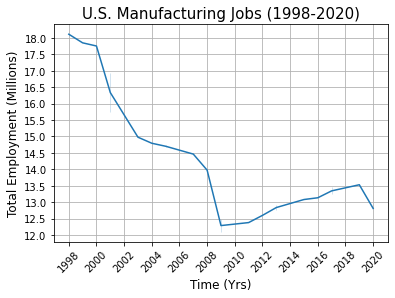

In [12]:
# U.S. Manufacturing Jobs 1998 - 2020
sns.lineplot(data=MFG98, x='Year', y='United States', markers=True, dashes=False)

plt.title('U.S. Manufacturing Jobs (1998-2020)', fontsize=15)

plt.ticklabel_format(axis='y', style='plain')
plt.locator_params(axis='y', nbins=15)
plt.ylabel('Total Employment (Millions)', fontsize=12)

plt.xticks(rotation=45)
plt.locator_params(axis='x', nbins=20)
plt.xlabel('Time (Yrs)', fontsize=12)

plt.grid()
plt.show()

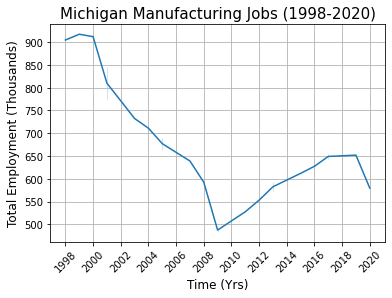

In [13]:
# Michigan
sns.lineplot(data=MFG98, x='Year', y='Michigan', markers=True, dashes=False)

plt.title('Michigan Manufacturing Jobs (1998-2020)', fontsize=15)

plt.ticklabel_format(axis='y', style='plain')
plt.locator_params(axis='y', nbins=15)
plt.ylabel('Total Employment (Thousands)', fontsize=12)

plt.xticks(rotation=45)
plt.locator_params(axis='x', nbins=20)
plt.xlabel('Time (Yrs)', fontsize=12)

plt.grid()
plt.show()

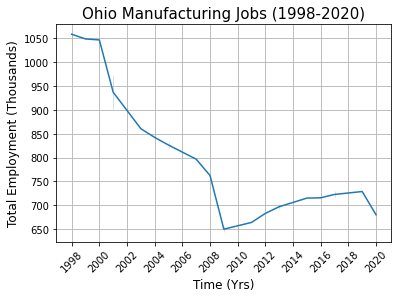

In [14]:
# Ohio
sns.lineplot(data=MFG98, x='Year', y='Ohio', markers=True, dashes=False)

plt.title('Ohio Manufacturing Jobs (1998-2020)', fontsize=15)

plt.ticklabel_format(axis='y', style='plain')
plt.locator_params(axis='y', nbins=15)
plt.ylabel('Total Employment (Thousands)', fontsize=12)

plt.xticks(rotation=45)
plt.locator_params(axis='x', nbins=20)
plt.xlabel('Time (Yrs)', fontsize=12)

plt.grid()
plt.show()

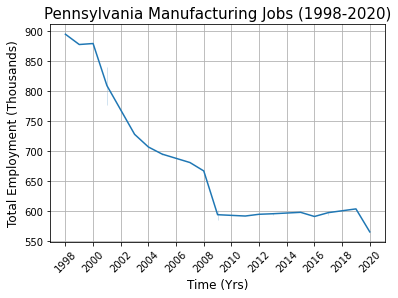

In [15]:
# Pennsylvania
sns.lineplot(data=MFG98, x='Year', y='Pennsylvania', markers=True, dashes=False)

plt.title('Pennsylvania Manufacturing Jobs (1998-2020)', fontsize=15)

plt.ticklabel_format(axis='y', style='plain')
plt.locator_params(axis='y', nbins=10)
plt.ylabel('Total Employment (Thousands)', fontsize=12)

plt.xticks(rotation=45)
plt.locator_params(axis='x', nbins=20)
plt.xlabel('Time (Yrs)', fontsize=12)

plt.grid()
plt.show()

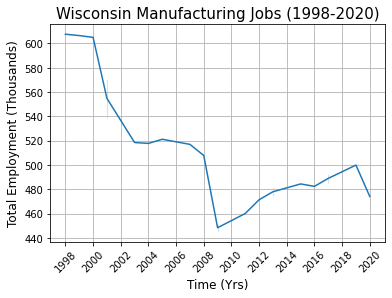

In [16]:
# Wisconsin
sns.lineplot(data=MFG98, x='Year', y='Wisconsin', markers=True, dashes=False)

plt.title('Wisconsin Manufacturing Jobs (1998-2020)', fontsize=15)

plt.ticklabel_format(axis='y', style='plain')
plt.locator_params(axis='y', nbins=15)
plt.ylabel('Total Employment (Thousands)', fontsize=12)

plt.xticks(rotation=45)
plt.locator_params(axis='x', nbins=20)
plt.xlabel('Time (Yrs)', fontsize=12)

plt.grid()
plt.show()

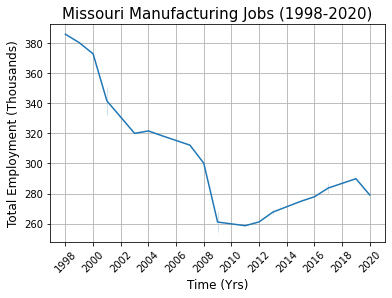

In [17]:
# Missouri
sns.lineplot(data=MFG98, x='Year', y='Missouri', markers=True, dashes=False)

plt.title('Missouri Manufacturing Jobs (1998-2020)', fontsize=15)

plt.ticklabel_format(axis='y', style='plain')
plt.locator_params(axis='y', nbins=10)
plt.ylabel('Total Employment (Thousands)', fontsize=12)

plt.xticks(rotation=45)
plt.locator_params(axis='x', nbins=20)
plt.xlabel('Time (Yrs)', fontsize=12)

plt.grid()
plt.show()

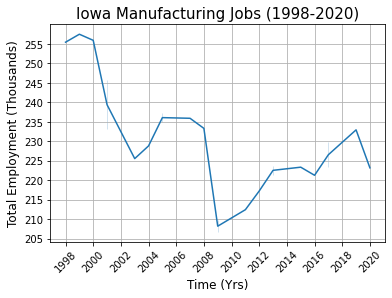

In [18]:
# Iowa
sns.lineplot(data=MFG98, x='Year', y='Iowa', markers=True, dashes=False)

plt.title('Iowa Manufacturing Jobs (1998-2020)', fontsize=15)

plt.ticklabel_format(axis='y', style='plain')
plt.locator_params(axis='y', nbins=20)
plt.ylabel('Total Employment (Thousands)', fontsize=12)

plt.xticks(rotation=45)
plt.locator_params(axis='x', nbins=20)
plt.xlabel('Time (Yrs)', fontsize=12)

plt.grid()
plt.show()

In [19]:
# Set index to GeoName and remove GeoName from header 
truck_df.set_index('GeoName', inplace=True)
truck_df.index.name = ''

# Transpose dataframe
truck_df = truck_df.transpose()

# Rename column to Year and reset index
truck_df.index.names = ['Year']
truck_df.reset_index(inplace=True)

# Replace all missing values as NaNs
truck_df.replace('(D)', np.nan, inplace=True)

# Convert dataframe to numerical values
truck_df = truck_df.astype(float)
truck_df['Year'] = truck_df['Year'].astype(int)

# Fill in NaNs by the average of the preceding and succeeding values
truck_df = truck_df.interpolate()

# Set dataframe values to Thousands
truck_df = truck_df.apply(lambda x: x / 1000)

# Reset Year
truck_df['Year'] = truck_df['Year'].apply(lambda x: x * 1000).astype(int)

# Set United States to Millions
truck_df['United States'] = truck_df['United States'].apply(lambda x: x / 1000)
truck_df

,Year,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,New England,Mideast,Great Lakes,Plains,Southeast,Southwest,Rocky Mountain,Far West
0,1998,1.8879,41.5080,3.472,22.667,39.946,177.803,24.394,10.090,3.996,0.370,76.660,63.841,3.135,11.392,94.249,66.139,35.099,24.970,32.299,28.799,8.956,24.835,21.451,48.281,33.905,25.239,58.900,7.937,25.735,7.496,5.267,53.654,9.771,55.159,69.013,7.531,88.947,30.760,24.866,77.827,3.083,26.740,8.376,71.596,159.975,21.501,3.906,40.963,31.426,13.504,55.806,4.665,52.753,215.841,353.422,194.516,530.108,223.173,69.889,248.198
1,1999,1.8735,40.9670,3.260,22.908,39.883,174.454,23.606,9.925,4.193,0.358,74.754,63.707,3.200,11.502,92.790,65.169,35.850,24.680,32.121,27.955,8.720,25.253,21.511,48.567,33.417,26.049,57.845,7.665,26.494,7.497,5.204,52.978,9.661,56.294,68.872,7.247,87.986,28.341,24.423,78.026,3.097,26.039,8.259,76.348,157.210,20.093,3.760,40.934,30.974,12.752,56.140,4.562,52.217,217.102,350.652,193.792,530.381,218.120,67.428,243.808
2,2000,1.9741,42.2040,3.367,24.094,40.809,183.373,25.195,10.611,4.155,0.370,79.769,66.715,3.310,12.245,97.408,67.241,37.759,25.923,33.293,29.534,9.175,25.652,22.624,51.019,35.618,27.707,60.265,8.001,28.107,8.230,5.487,56.322,10.414,58.910,71.179,7.493,92.328,29.685,25.653,83.945,3.148,28.229,8.757,82.489,169.667,21.116,3.874,42.382,32.754,13.142,58.499,4.854,54.919,229.354,366.495,203.922,557.452,233.860,71.411,256.687
3,2001,1.9543,41.3630,3.452,24.168,42.252,178.916,24.713,10.347,3.881,0.337,80.376,66.557,3.347,11.999,94.849,66.265,37.402,24.827,33.395,30.339,9.116,25.311,22.464,49.973,35.382,26.786,58.517,7.932,28.708,8.104,5.487,56.925,9.643,58.711,67.992,7.409,91.430,29.468,24.328,84.708,3.410,28.612,8.767,82.394,168.521,21.185,3.781,41.413,32.502,12.963,58.598,4.975,54.605,229.873,361.115,201.012,554.442,231.800,70.804,250.649
4,2001,1.9426,40.3360,3.667,25.253,45.047,181.063,24.870,10.018,3.917,0.363,81.894,65.541,3.354,12.061,92.710,64.017,38.477,24.653,32.821,29.848,9.056,24.855,21.681,50.382,35.448,27.248,56.935,7.950,30.038,8.161,5.544,55.510,9.765,56.869,65.258,7.654,92.612,28.356,24.194,84.309,3.450,28.605,8.682,78.571,168.505,20.167,3.777,41.355,32.158,12.486,58.142,4.967,53.526,225.823,357.863,201.887,549.010,231.879,70.015,252.597
5,2003,1.8995,38.8670,3.659,25.039,43.664,178.740,24.014,9.625,3.903,0.374,79.851,64.558,3.468,11.839,92.380,62.020,38.234,23.349,31.783,28.620,8.666,23.847,21.592,48.959,34.592,26.771,55.108,7.450,31.200,8.518,5.544,55.342,9.726,55.241,63.325,7.426,89.446,26.842,24.138,82.183,3.344,27.918,8.264,76.505,162.697,20.132,3.605,41.283,31.138,11.946,57.998,4.767,52.376,220.890,350.803,198.173,535.091,224.304,68.202,249.661
6,2004,1.9533,40.1355,3.846,25.926,43.534,186.863,24.448,9.960,4.056,0.338,83.910,66.521,3.445,12.289,93.977,64.105,39.805,23.394,32.462,28.313,8.625,24.475,21.444,51.101,35.463,27.343,56.522,7.435,32.165,9.358,5.542,56.377,10.027,55.691,65.290,7.383,92.054,27.078,25.355,82.362,3.332,28.722,8.150,78.290,169.954,20.891,3.651,42.543,32.835,12.131,59.628,4.872,52.554,223.299,360.865,203.962,555.420,232.985,69.935,261.702
7,2005,2.0487,41.4040,3.928,28.297,45.429,195.941,26.032,10.324,3.762,0.365,91.727,70.278,3.759,12.720,99.072,67.676,41.450,23.439,33.942,28.791,8.843,24.774,21.738,54.566,36.882,28.769,58.131,7.576,33.854,10.578,5.684,55.971,10.439,57.311,67.447,7.581,98.020,28.093,26.340,85.432,3.318,29.908,8.414,81.348,184.595,21.767,3.672,43.901,35.648,12.805,61.699,5.260,53.579,227.615,381.033,209.751,575.749,251.424,73.355,276.194
8,2005,2.1073,42.3080,4.094

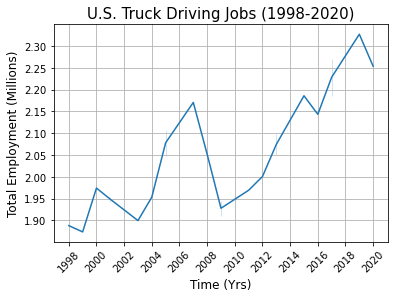

In [23]:
# U.S. Truck Driving Jobs 1998 - 2020
sns.lineplot(data=truck_df, x='Year', y='United States', markers=True, dashes=False)

plt.title('U.S. Truck Driving Jobs (1998-2020)', fontsize=15)

plt.ticklabel_format(axis='y', style='plain')
plt.locator_params(axis='y', nbins=15)
plt.ylabel('Total Employment (Millions)', fontsize=12)

plt.xticks(rotation=45)
plt.locator_params(axis='x', nbins=20)
plt.xlabel('Time (Yrs)', fontsize=12)

plt.grid()
plt.show()